In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"zaytsevpavel1376","key":"262da53e6f5a27cf57b511695d855fd4"}'}

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d arnabchaki/data-science-salaries-2023

Dataset URL: https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023
License(s): DbCL-1.0
  0% 0.00/25.4k [00:00<?, ?B/s]
100% 25.4k/25.4k [00:00<00:00, 31.9MB/s]


In [5]:
! unzip  '/content/data-science-salaries-2023.zip' -d '/content/data-science-salaries-2023'

Archive:  /content/data-science-salaries-2023.zip
  inflating: /content/data-science-salaries-2023/ds_salaries.csv  


In [387]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [388]:
start_data = pd.read_csv('/content/data-science-salaries-2023/ds_salaries.csv', sep=',')
start_data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [389]:
start_data['Target'] = start_data['salary_in_usd']
start_data.drop(['salary_in_usd'], axis=1, inplace=True)
start_data.drop(['salary'], axis=1, inplace=True)

О датасете
Набор данных о зарплатах в области науки о данных содержит 11 столбцов, каждый из которых:

work_year: год выплаты зарплаты.

experience_level: уровень опыта работы на должности в течение года.

занятости_типа: тип занятости для должности.

job_title: Должность, на которой вы работали в течение года.

зарплата: общая сумма выплаченной брутто-зарплаты.

Salary_currency: Валюта выплачиваемой зарплаты в виде кода валюты ISO 4217.

Salaryinusd: Заработная плата в долларах США.

работник_резиденция: основная страна проживания сотрудника в течение рабочего года в виде кода страны ISO 3166.

Remote_ratio: общий объем работы, выполненной удаленно.

Company_location: Страна головного офиса или филиала работодателя.

Company_size: Среднее количество людей, работавших в компании в течение года.


## Информация о признаках

In [390]:
print("Кол-во уникальных значений")
print(start_data.nunique(), '\n')

print("Типы переменных о датафрейме, кол-во пропущенных значений")
print(start_data.info())

Кол-во уникальных значений
work_year                4
experience_level         4
employment_type          4
job_title               93
salary_currency         20
employee_residence      78
remote_ratio             3
company_location        72
company_size             3
Target                1035
dtype: int64 

Типы переменных о датафрейме, кол-во пропущенных значений
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary_currency     3755 non-null   object
 5   employee_residence  3755 non-null   object
 6   remote_ratio        3755 non-null   int64 
 7   company_location    3755 non-null   object
 8   company_size        3755 non-null   ob

In [391]:
categ_col = ['experience_level', 'employment_type', 'job_title',
             'salary_currency', "employee_residence",
             "company_location"]



In [392]:
start_data.head()

,work_year,experience_level,employment_type,job_title,salary_currency,employee_residence,remote_ratio,company_location,company_size,Target
0,2023,SE,FT,Principal Data Scientist,EUR,ES,100,ES,L,85847
1,2023,MI,CT,ML Engineer,USD,US,100,US,S,30000
2,2023,MI,CT,ML Engineer,USD,US,100,US,S,25500
3,2023,SE,FT,Data Scientist,USD,CA,100,CA,M,175000
4,2023,SE,FT,Data Scientist,USD,CA,100,CA,M,120000


## Кодирование категориальных переменных

In [393]:
from sklearn.preprocessing import StandardScaler
from  sklearn.preprocessing import LabelEncoder, OneHotEncoder

data = start_data.copy()
oneHotEncode = OneHotEncoder()
data_categ_encode = pd.DataFrame(oneHotEncode.fit_transform(data[categ_col]).toarray(), columns = oneHotEncode.get_feature_names_out())

data_categ_encode

,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT,job_title_3D Computer Vision Researcher,job_title_AI Developer,...,company_location_RU,company_location_SE,company_location_SG,company_location_SI,company_location_SK,company_location_TH,company_location_TR,company_location_UA,company_location_US,company_location_VN
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3750,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3751,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3752,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3753,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Анализ непрерывных данных

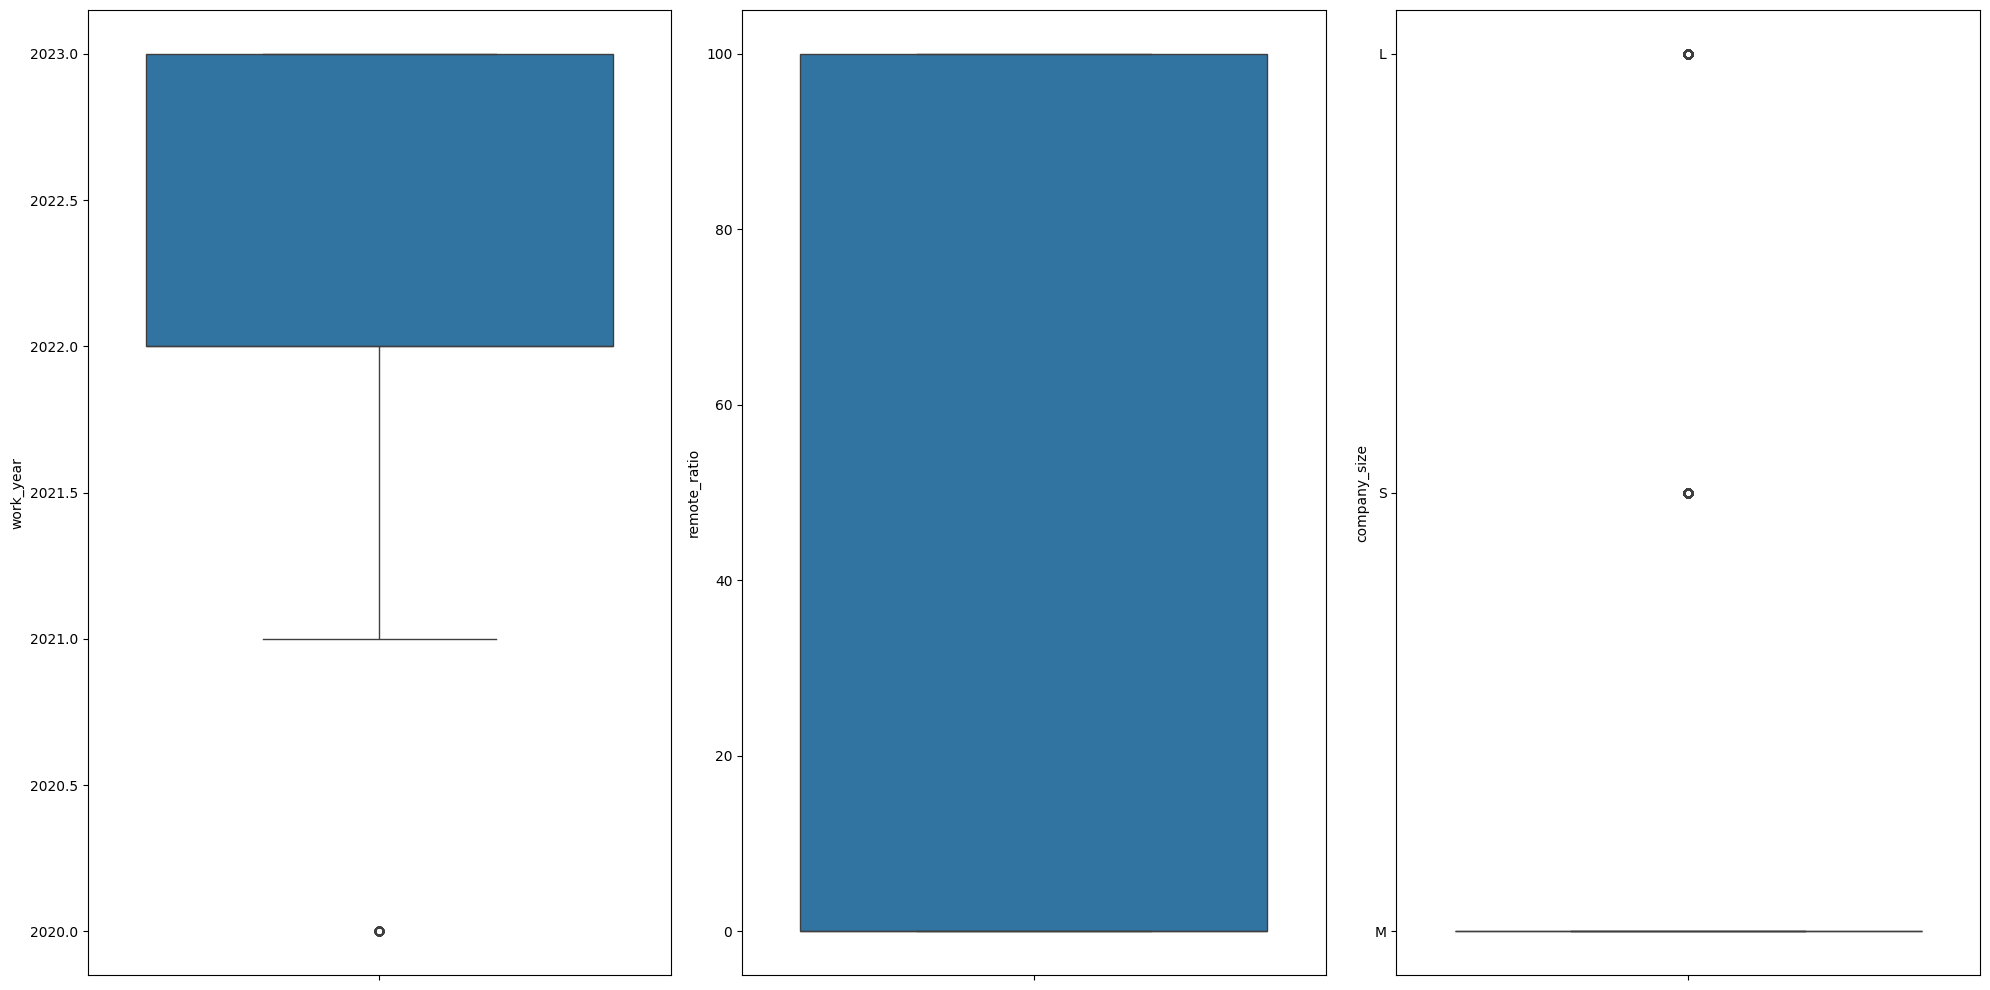

In [394]:
import seaborn as sns

encoder = LabelEncoder()

data_cont = data.drop(categ_col, axis=1)
y = data_cont['Target']
data_cont.drop(['Target'], axis=1, inplace=True)

fig = plt.figure(figsize=(20, 10))
for ind, col in enumerate(data_cont.columns):
  ax = fig.add_subplot(1, len(data_cont.columns), ind+1)
  sns.boxplot(data_cont[col], ax=ax)

fig.tight_layout()

In [395]:
data_cont['company_size'].unique()

array(['L', 'S', 'M'], dtype=object)

In [396]:
mapping = {'L': 3, 'S': 1, 'M': 2}

# Используем метод map() для замены значений в столбце
data_cont['company_size'] = data_cont['company_size'].map(mapping)
data_cont['company_size'].unique()

array([3, 1, 2])

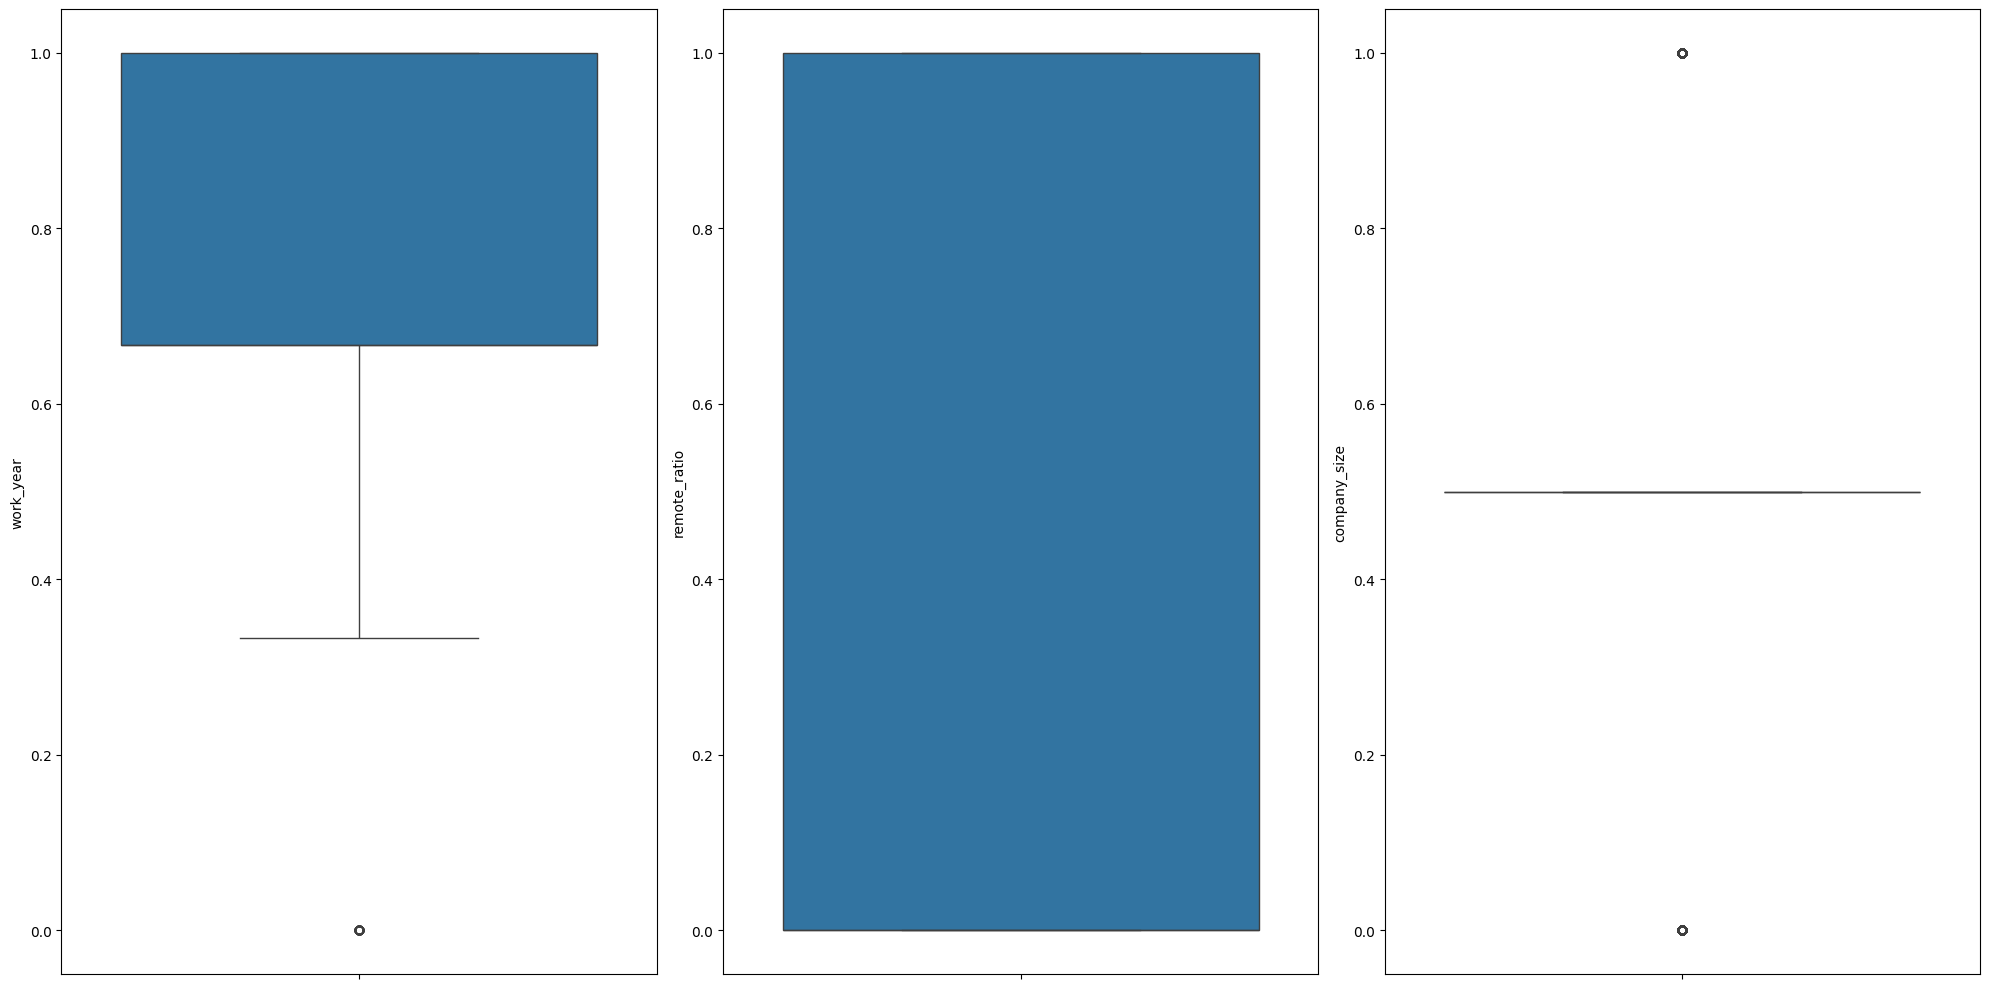

In [397]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_cont_sd = pd.DataFrame(scaler.fit(data_cont).transform(data_cont), columns=scaler.get_feature_names_out())

fig = plt.figure(figsize=(20, 10))
for ind, col in enumerate(data_cont_sd.columns):
  ax = fig.add_subplot(1, len(data_cont_sd.columns), ind+1)
  sns.boxplot(data_cont_sd[col], ax=ax)

fig.tight_layout()


In [398]:
corr = data_cont_sd.corr()

cmap = sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .format(precision=3)\
    .set_properties(**{'max-width': '80px', 'font-size': '12pt'})\
    .set_caption("Корреляция непрерывных признаков")\
    .set_table_styles(magnify())

,work_year,remote_ratio,company_size
work_year,1.000,-0.236,-0.139
remote_ratio,-0.236,1.000,0.037
company_size,-0.139,0.037,1.000


### Отлично, признаки мало коррелируют друг с другом

Превартим задачу регрессии в задачу классификации, для чего разделим целевую переменную на три интервала. (типо низкая, средняя и высокая зп). (определяем по среднему откланению)

In [399]:
y_mean = y.mean()
y_std = ((((y - y.mean())**2).sum())/y.size)**0.5

In [400]:
def for_apply(x):
    if x < y_mean - y_std:
      return 0
    elif x > y_mean + y_std:
      return 2
    else:
      return 1

y = y.apply(for_apply)
y

,Target
0,1
1,0
2,0
3,1
4,1
...,...
3750,2
3751,1
3752,1
3753,1


In [401]:
X = pd.concat([data_cont_sd, data_categ_encode], axis=1)
pd.concat([X, y], axis=1)

,work_year,remote_ratio,company_size,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,employment_type_FT,...,company_location_SE,company_location_SG,company_location_SI,company_location_SK,company_location_TH,company_location_TR,company_location_UA,company_location_US,company_location_VN,Target
0,1.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,1.000000,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2,1.000000,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,1.000000,1.0,0.5,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,1.000000,1.0,0.5,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3750,0.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
3751,0.333333,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
3752,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
3753,0.000000,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1


In [402]:
X1 = X.copy()
y1 = y.copy()
X = X.values
y = y.values

In [403]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(class_weight='balanced', classes=[0, 1, 2], y=y)
class_weights

array([2.10011186, 0.475738  , 2.37058081])

In [404]:
class_weights = np.array([x for x in class_weights], dtype=np.float32)
type(class_weights[0])

numpy.float32

In [405]:
from sklearn.model_selection import train_test_split
X_train, X_dum, y_train, y_dum=train_test_split(X, y, test_size=0.3)
X_val, X_test, y_val, y_test= train_test_split(X_dum, y_dum ,test_size=0.5)

In [406]:
import torch
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import Dataset, TensorDataset, DataLoader
import torchvision.transforms as T

In [407]:
device = 'cuda' if torch.cuda.is_available() else 'cpu' # вычисления на графическом процессоре, если возможно
device

'cpu'

In [408]:
class MyDataset(Dataset):
  def __init__(self, data, targets, transform=None):
      self.data = torch.Tensor(data)
      self.targets = torch.LongTensor(targets)
      self.transform = transform

  def __getitem__(self, index):
      x = self.data[index]
      y = self.targets[index]
      return x, y

  def get_labels(self):
    return self.targets

  def __len__(self):
      return len(self.data)

In [409]:
train_dataset=MyDataset(X_train,y_train)
val_dataset=MyDataset(X_val,y_val)
test_dataset=MyDataset(X_test,y_test)

In [410]:
print(f'''Длина тестовой выборки: {len(test_dataset)}
Длина валидационной выборки: {len(val_dataset)}
Длина тренировочной выборки: {len(train_dataset)}''')

Длина тестовой выборки: 564
Длина валидационной выборки: 563
Длина тренировочной выборки: 2628


In [411]:
!pip install torchsampler

In [412]:
from torchsampler import ImbalancedDatasetSampler

In [413]:
batch_size=32 # размер пакета
train_loader = DataLoader(train_dataset, batch_size=batch_size,shuffle=False,
                          sampler=ImbalancedDatasetSampler(train_dataset))
val_loader = DataLoader(val_dataset, batch_size=batch_size,shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size,shuffle=True)

In [414]:
class Classification_Model_FFNN(nn.Module):
  def __init__(self, num_inputs, num_classes):
      super(Classification_Model_FFNN, self).__init__()
      self.pipe = nn.Sequential(
          nn.Linear(num_inputs, 128, bias=False),
          nn.ReLU6(inplace=True),
          nn.BatchNorm1d(128),

          nn.Linear(128, 128, bias=False),
          nn.ReLU6(inplace=True),
          nn.BatchNorm1d(128),

          nn.Linear(128, 128, bias=False),
          nn.ReLU6(inplace=True),
          nn.BatchNorm1d(128),

          nn.Linear(128, 64, bias=False),
          nn.ReLU6(inplace=True),
          nn.BatchNorm1d(64),

          nn.Linear(64, 3))

  def forward(self, x):
      return self.pipe(x)

In [415]:
model=Classification_Model_FFNN(len(X[0]), len(set(y)))
model.to(device);

In [416]:
! pip install torchinfo

In [417]:
from torchinfo import summary
summary(model,input_size=(1, len(X[0])))

Layer (type:depth-idx)                   Output Shape              Param #
Classification_Model_FFNN                [1, 3]                    --
├─Sequential: 1-1                        [1, 3]                    --
│    └─Linear: 2-1                       [1, 128]                  35,072
│    └─ReLU6: 2-2                        [1, 128]                  --
│    └─BatchNorm1d: 2-3                  [1, 128]                  256
│    └─Linear: 2-4                       [1, 128]                  16,384
│    └─ReLU6: 2-5                        [1, 128]                  --
│    └─BatchNorm1d: 2-6                  [1, 128]                  256
│    └─Linear: 2-7                       [1, 128]                  16,384
│    └─ReLU6: 2-8                        [1, 128]                  --
│    └─BatchNorm1d: 2-9                  [1, 128]                  256
│    └─Linear: 2-10                      [1, 64]                   8,192
│    └─ReLU6: 2-11                       [1, 64]                   

In [433]:
criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights))
optimizer = optim.Adam(model.parameters(), weight_decay=0.1)

In [434]:
from tqdm import tqdm

In [435]:
def accuracy(predictions, labels):
    classes = torch.argmax(predictions, dim=1)
    return torch.mean((classes == labels).float())

In [436]:
train_losses=[]
train_accs=[]
def train(model,epoch):
  print('\nEpoch : %d'%epoch)
  model.train() # веса модели можно обновлять
  running_loss= 0.
  running_acc = 0.
  for data in tqdm(train_loader):
      inputs, targets=data[0].to(device),data[1].to(device) # распаковываем пакеты
      optimizer.zero_grad() # обнуляем градиенты
      outputs=model(inputs) # считаем предсказания - прямой проход модели
      loss=criterion(outputs,targets) # ошибка пакета
      loss.backward() # обратное распространение ошибки
      optimizer.step() # итерация алгоритма оптимизации

      running_loss += loss.item()
      running_acc += accuracy(outputs,targets)

  train_loss=running_loss/len(train_loader)
  train_acc=running_acc/len(train_loader)

  train_losses.append(train_loss)
  train_accs.append(train_acc)
  print('Средняя ошибка модели на тренировочной выборке: %.4f'%(train_loss)+'   Средняя точность модели на тренировочной выборке: %.4f'%(train_acc))

In [437]:
val_losses=[]
val_accs=[]
def val(model,epoch):
    print('\nEpoch : %d'%epoch)
    model.eval() # веса модели заморожены
    running_loss = 0.
    running_acc = 0.
    with torch.no_grad(): # запрещаем переисывать градиенты
        for data in tqdm(val_loader):
            inputs, targets=data[0].to(device),data[1].to(device)
            outputs=model(inputs)
            loss=criterion(outputs,targets)

            running_loss += loss.item()
            running_acc += accuracy(outputs,targets)

        val_loss=running_loss/len(val_loader)
        val_acc=running_acc/len(val_loader)

        val_losses.append(val_loss)
        val_accs.append(val_acc)
        print('Средняя ошибка модели на валидационной выборке: %.4f'%(val_loss)+'   Средняя точность модели на валидационной выборке: %.4f'%(val_acc))

In [438]:
class EarlyStopper:
    def __init__(self, patience=1, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.min_validation_loss = float('inf')

    def early_stop(self, validation_loss):
        if validation_loss < self.min_validation_loss:
            self.min_validation_loss = validation_loss
            self.counter = 0
        elif validation_loss > (self.min_validation_loss + self.min_delta):
            self.counter += 1
            if self.counter >= self.patience:
                return True
        return False

In [439]:
max_epochs=100
best_acc=0.0
early_stopper = EarlyStopper(patience=5, min_delta=0.1)
for epoch in range(1,max_epochs+1):
    train(model,epoch)
    val(model,epoch)
    if val_accs[-1] > best_acc:
       torch.save(model, 'best-model.pt')
       best_acc = val_accs[-1]
    if early_stopper.early_stop(val_losses[-1]):
      break


Epoch : 1


100%|██████████| 83/83 [00:00<00:00, 83.08it/s]


Средняя ошибка модели на тренировочной выборке: 0.7349   Средняя точность модели на тренировочной выборке: 0.6529

Epoch : 1


100%|██████████| 18/18 [00:00<00:00, 808.14it/s]


Средняя ошибка модели на валидационной выборке: 0.7810   Средняя точность модели на валидационной выборке: 0.6578

Epoch : 2


100%|██████████| 83/83 [00:00<00:00, 186.76it/s]


Средняя ошибка модели на тренировочной выборке: 0.7225   Средняя точность модели на тренировочной выборке: 0.6623

Epoch : 2


100%|██████████| 18/18 [00:00<00:00, 852.84it/s]


Средняя ошибка модели на валидационной выборке: 0.8469   Средняя точность модели на валидационной выборке: 0.5229

Epoch : 3


100%|██████████| 83/83 [00:00<00:00, 199.00it/s]


Средняя ошибка модели на тренировочной выборке: 0.7203   Средняя точность модели на тренировочной выборке: 0.6679

Epoch : 3


100%|██████████| 18/18 [00:00<00:00, 787.10it/s]


Средняя ошибка модели на валидационной выборке: 0.8237   Средняя точность модели на валидационной выборке: 0.5287

Epoch : 4


100%|██████████| 83/83 [00:00<00:00, 194.46it/s]


Средняя ошибка модели на тренировочной выборке: 0.6986   Средняя точность модели на тренировочной выборке: 0.6743

Epoch : 4


100%|██████████| 18/18 [00:00<00:00, 819.87it/s]


Средняя ошибка модели на валидационной выборке: 0.8026   Средняя точность модели на валидационной выборке: 0.5506

Epoch : 5


100%|██████████| 83/83 [00:00<00:00, 206.53it/s]


Средняя ошибка модели на тренировочной выборке: 0.7268   Средняя точность модели на тренировочной выборке: 0.6574

Epoch : 5


100%|██████████| 18/18 [00:00<00:00, 863.18it/s]


Средняя ошибка модели на валидационной выборке: 0.8317   Средняя точность модели на валидационной выборке: 0.6965

Epoch : 6


100%|██████████| 83/83 [00:00<00:00, 183.81it/s]


Средняя ошибка модели на тренировочной выборке: 0.7122   Средняя точность модели на тренировочной выборке: 0.6721

Epoch : 6


100%|██████████| 18/18 [00:00<00:00, 719.04it/s]


Средняя ошибка модели на валидационной выборке: 0.9342   Средняя точность модели на валидационной выборке: 0.3989

Epoch : 7


100%|██████████| 83/83 [00:00<00:00, 211.39it/s]


Средняя ошибка модели на тренировочной выборке: 0.7152   Средняя точность модели на тренировочной выборке: 0.6657

Epoch : 7


100%|██████████| 18/18 [00:00<00:00, 784.82it/s]


Средняя ошибка модели на валидационной выборке: 0.8624   Средняя точность модели на валидационной выборке: 0.4793

Epoch : 8


100%|██████████| 83/83 [00:00<00:00, 187.90it/s]


Средняя ошибка модели на тренировочной выборке: 0.6935   Средняя точность модели на тренировочной выборке: 0.6721

Epoch : 8


100%|██████████| 18/18 [00:00<00:00, 546.26it/s]


Средняя ошибка модели на валидационной выборке: 0.7583   Средняя точность модели на валидационной выборке: 0.7527

Epoch : 9


100%|██████████| 83/83 [00:00<00:00, 196.07it/s]


Средняя ошибка модели на тренировочной выборке: 0.7346   Средняя точность модели на тренировочной выборке: 0.6600

Epoch : 9


100%|██████████| 18/18 [00:00<00:00, 932.29it/s]


Средняя ошибка модели на валидационной выборке: 0.8029   Средняя точность модели на валидационной выборке: 0.5027

Epoch : 10


100%|██████████| 83/83 [00:00<00:00, 196.38it/s]


Средняя ошибка модели на тренировочной выборке: 0.7048   Средняя точность модели на тренировочной выборке: 0.6777

Epoch : 10


100%|██████████| 18/18 [00:00<00:00, 622.56it/s]


Средняя ошибка модели на валидационной выборке: 0.7880   Средняя точность модели на валидационной выборке: 0.6381

Epoch : 11


100%|██████████| 83/83 [00:00<00:00, 197.70it/s]


Средняя ошибка модели на тренировочной выборке: 0.7297   Средняя точность модели на тренировочной выборке: 0.6502

Epoch : 11


100%|██████████| 18/18 [00:00<00:00, 859.39it/s]


Средняя ошибка модели на валидационной выборке: 0.7930   Средняя точность модели на валидационной выборке: 0.6225

Epoch : 12


100%|██████████| 83/83 [00:00<00:00, 202.21it/s]


Средняя ошибка модели на тренировочной выборке: 0.7090   Средняя точность модели на тренировочной выборке: 0.6856

Epoch : 12


100%|██████████| 18/18 [00:00<00:00, 779.72it/s]


Средняя ошибка модели на валидационной выборке: 0.8274   Средняя точность модели на валидационной выборке: 0.5883

Epoch : 13


100%|██████████| 83/83 [00:00<00:00, 192.79it/s]


Средняя ошибка модели на тренировочной выборке: 0.7229   Средняя точность модели на тренировочной выборке: 0.6687

Epoch : 13


100%|██████████| 18/18 [00:00<00:00, 889.19it/s]


Средняя ошибка модели на валидационной выборке: 0.8149   Средняя точность модели на валидационной выборке: 0.6022

Epoch : 14


100%|██████████| 83/83 [00:00<00:00, 207.68it/s]


Средняя ошибка модели на тренировочной выборке: 0.7261   Средняя точность модели на тренировочной выборке: 0.6743

Epoch : 14


100%|██████████| 18/18 [00:00<00:00, 554.98it/s]


Средняя ошибка модели на валидационной выборке: 0.8517   Средняя точность модели на валидационной выборке: 0.4509

Epoch : 15


100%|██████████| 83/83 [00:00<00:00, 200.01it/s]


Средняя ошибка модели на тренировочной выборке: 0.7218   Средняя точность модели на тренировочной выборке: 0.6875

Epoch : 15


100%|██████████| 18/18 [00:00<00:00, 830.88it/s]


Средняя ошибка модели на валидационной выборке: 0.8695   Средняя точность модели на валидационной выборке: 0.4580

Epoch : 16


100%|██████████| 83/83 [00:00<00:00, 198.31it/s]


Средняя ошибка модели на тренировочной выборке: 0.7281   Средняя точность модели на тренировочной выборке: 0.6830

Epoch : 16


100%|██████████| 18/18 [00:00<00:00, 807.11it/s]


Средняя ошибка модели на валидационной выборке: 0.9035   Средняя точность модели на валидационной выборке: 0.6103

Epoch : 17


100%|██████████| 83/83 [00:00<00:00, 166.28it/s]


Средняя ошибка модели на тренировочной выборке: 0.7449   Средняя точность модели на тренировочной выборке: 0.6747

Epoch : 17


100%|██████████| 18/18 [00:00<00:00, 755.59it/s]


Средняя ошибка модели на валидационной выборке: 0.8594   Средняя точность модели на валидационной выборке: 0.4940

Epoch : 18


100%|██████████| 83/83 [00:00<00:00, 171.32it/s]


Средняя ошибка модели на тренировочной выборке: 0.7591   Средняя точность модели на тренировочной выборке: 0.6664

Epoch : 18


100%|██████████| 18/18 [00:00<00:00, 683.64it/s]


Средняя ошибка модели на валидационной выборке: 0.8405   Средняя точность модели на валидационной выборке: 0.6196

Epoch : 19


100%|██████████| 83/83 [00:00<00:00, 147.62it/s]


Средняя ошибка модели на тренировочной выборке: 0.7579   Средняя точность модели на тренировочной выборке: 0.6593

Epoch : 19


100%|██████████| 18/18 [00:00<00:00, 734.20it/s]


Средняя ошибка модели на валидационной выборке: 0.8837   Средняя точность модели на валидационной выборке: 0.4638

Epoch : 20


100%|██████████| 83/83 [00:00<00:00, 161.82it/s]


Средняя ошибка модели на тренировочной выборке: 0.7341   Средняя точность модели на тренировочной выборке: 0.6819

Epoch : 20


100%|██████████| 18/18 [00:00<00:00, 602.10it/s]


Средняя ошибка модели на валидационной выборке: 0.8572   Средняя точность модели на валидационной выборке: 0.5494

Epoch : 21


100%|██████████| 83/83 [00:00<00:00, 165.86it/s]


Средняя ошибка модели на тренировочной выборке: 0.7243   Средняя точность модели на тренировочной выборке: 0.6815

Epoch : 21


100%|██████████| 18/18 [00:00<00:00, 778.75it/s]


Средняя ошибка модели на валидационной выборке: 0.8576   Средняя точность модели на валидационной выборке: 0.4771

Epoch : 22


100%|██████████| 83/83 [00:00<00:00, 117.32it/s]


Средняя ошибка модели на тренировочной выборке: 0.7508   Средняя точность модели на тренировочной выборке: 0.6743

Epoch : 22


100%|██████████| 18/18 [00:00<00:00, 599.02it/s]

Средняя ошибка модели на валидационной выборке: 0.8703   Средняя точность модели на валидационной выборке: 0.4817


In [440]:
best_acc

tensor(0.7527)

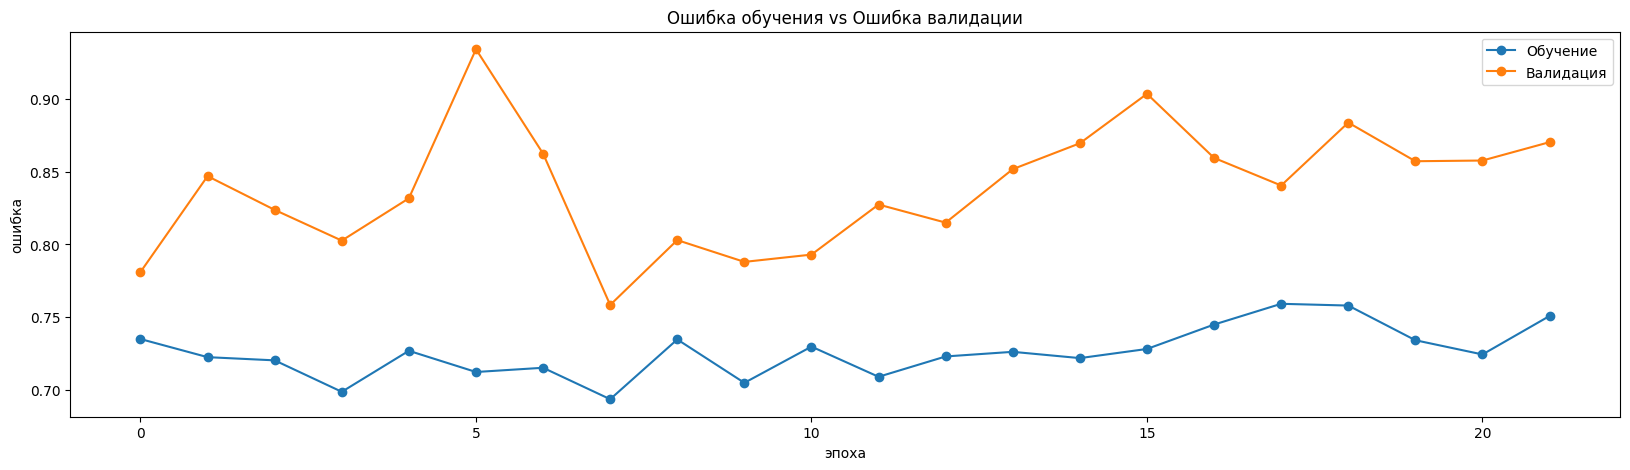

In [441]:
plt.rcParams["figure.figsize"] = (20,5)
plt.plot(train_losses,'-o')
plt.plot(val_losses,'-o')
plt.xlabel('эпоха')
plt.ylabel('ошибка')
plt.legend(['Обучение','Валидация'])
plt.title('Ошибка обучения vs Ошибка валидации')
plt.show()

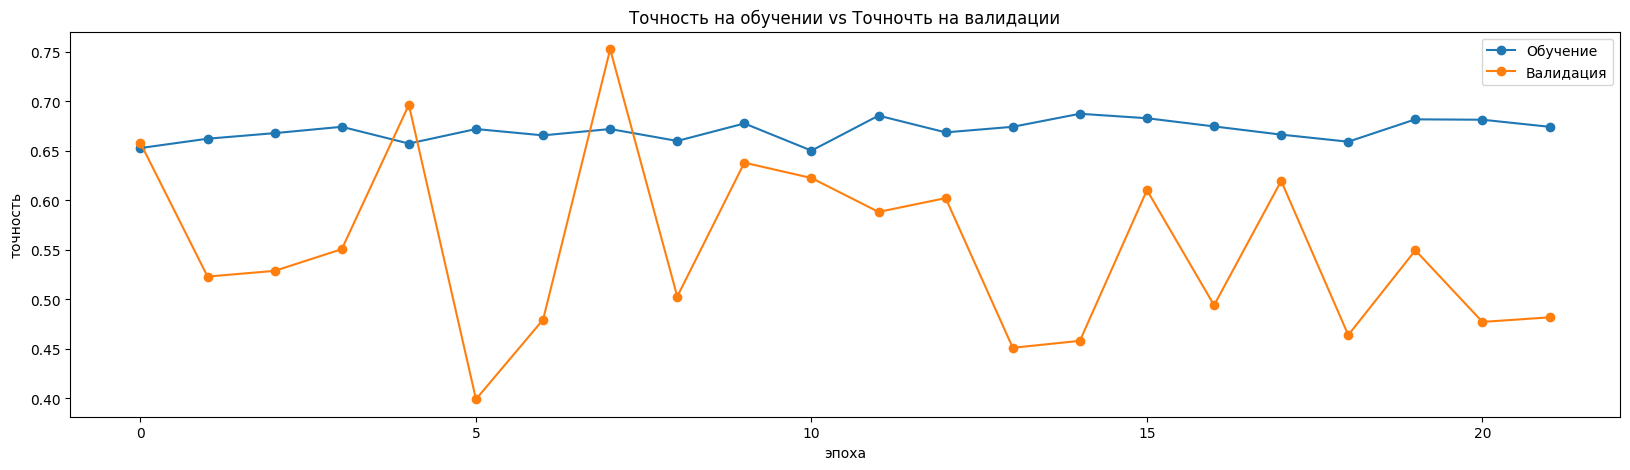

In [442]:
plt.rcParams["figure.figsize"] = (20,5)
plt.plot(train_accs,'-o')
plt.plot(val_accs,'-o')
plt.xlabel('эпоха')
plt.ylabel('точность')
plt.legend(['Обучение','Валидация'])
plt.title('Точность на обучении vs Точночть на валидации')
plt.show()

In [443]:
model = torch.load('best-model.pt');
model.eval();

<ipython-input-443-fd4f3f516958>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load('best-model.pt');


In [444]:
preds=[]
trgts=[]
with torch.no_grad():
  for data in tqdm(test_loader):
    inputs, targets=data[0].to(device),data[1].to(device)
    outputs=model(inputs)
    targets=targets.to('cpu').numpy()
    pred = outputs.max(1, keepdim=True)[1]
    pred = pred.to('cpu').numpy()
    trgts.append(targets)
    preds.append(pred)


100%|██████████| 18/18 [00:00<00:00, 431.44it/s]


In [445]:
targets=[x for sub in trgts for x in sub]
predictions=[x[0] for sub in preds for x in sub]
targets=np.array(targets)
predictions=np.array(predictions)

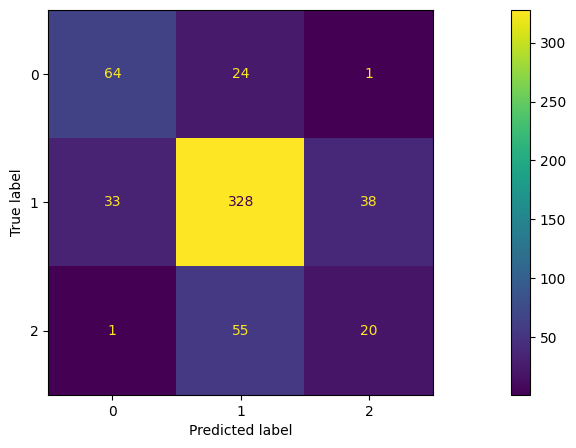

In [446]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score
cm = confusion_matrix(targets, predictions)
ConfusionMatrixDisplay(cm).plot()

In [447]:
f1_score(targets, predictions,average='micro')

0.7304964539007093

Модель обучилась не идеально, однако результат не такой плохой. Интересно то - что веса лучше подбирать вручную, потому что, когда веса автоматически подбираются по объему экземляров классов, модель совершенно не видит среднюю зп. Все метки либо 0 либо 2. А при отсутсвии весов модель многовато высоких зарплат причисляет к низким. Однако мы и метки расставили условно, возможно, если более точно определить границы, то и классификация будет точнее. Но даже при этом результат удовлетворительный и точность (f1) классификации больше 70%